# CS4320 - Introduction to Machine Learning 

## Homework 5: Evaluation metrics

**Please type your name and A number here:**

In [1]:
Name = "Rylei Mindrum"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02352206"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

## Imports

In [2]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_curve,
    precision_recall_curve
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

rubric={points:12}

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B.

- Model A confusion matrix

In [3]:
cm_A = pd.DataFrame(
    [[3, 10],
     [1, 106]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_A

,Predicted disease,Predicted no disease
Actual disease,3,10
Actual no disease,1,106


- Model B confusion matrix

In [4]:
cm_B = pd.DataFrame(
    [[8, 5],
     [12, 95]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_B

,Predicted disease,Predicted no disease
Actual disease,8,5
Actual no disease,12,95


### 1.1 Positive vs. negative class 
rubric={points:1}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

Type your answer here: Positive Class: In medical diagnosis, the positive class is usually having a disease. So the the positive class is the class that relates to numbers having the disease.
Negative Class: Based on the previous, the negative class would be not having the disease.

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [5]:
results_dict = {"A": {}, "B": {}}

In [6]:
##truePositive+trueNegative/totalCases

In [7]:
results_dict["A"]["accuracy"] = (3+106)/(3+10+1+106)  # Replace your code here
results_dict["B"]["accuracy"] = (8+95)/(8+5+12+95)  # Replace your code here

In [8]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333


### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Type your answer here: I would pick model one because the accuracy value is higher by .05

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without calling `scikit-learn` functions.

In [9]:
results_dict["A"]["precision"] = 3/(3+10)  # truePositives/(truePositive+falsePositives)
results_dict["B"]["precision"] = 8/(8+5)  # Replace your code here
results_dict["A"]["recall"] = 3/(3+1)  # Replace your code here
results_dict["B"]["recall"] = 8/(8+12)  # Replace your code here
results_dict["A"]["f1"] = 2*(((3/(3+10))*(3/(3+1)))/((3/(3+10))+(3/(3+1))))  # Replace your code here
results_dict["B"]["f1"] = 2*(((8/(8+5))*(8/(8+12)))/((8/(8+5))+(8/(8+12))))  # Replace your code here

Show the dataframe with all results. 

In [10]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.230769,0.615385
recall,0.750000,0.400000
f1,0.352941,0.484848


In [11]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.230769,0.615385
recall,0.750000,0.400000
f1,0.352941,0.484848


### 1.5 Discussion
rubric={points:2}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

Type your answer here:

1. Based on my opinion, recall may be the most important. I think this because missing a disease has a much higher cost than reporting a false negative. Second to this I think that Precision would be of high importance. 

2. While Model B has a better precision and f1 score, it misses more actual cases of the disease. Based on this I would choose Model A even though it has a higher number of false-positives. I think this because in medial diagnosis I feel that the cost of missing a disease is much higher than a false positive. 

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>
rubric={points:48}

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis. For now, we'll just treat it as a binary classification problem. 

In [12]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


### 2.1 Distribution of target values
rubric={points:2}

**Your tasks:**

Examine the distribution of target values in the train split.(Print out the count of each class) Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [13]:
print(train_df["churn"].value_counts())

False    1984
True      349
Name: churn, dtype: int64


Type your answer here: Yes, there is an input imbalance in the code. The false numbers are much higher than the true. We do need to deal with it becayse if we dont, it could skew the performance of the model. This may lead to a poor generalization of the minority class. 

### 2.2 Column transformer 
rubric={points:12}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

You can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 


In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [14]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [15]:
categorical_features = ["state", "area code", "international plan", "voice mail plan"]
numerical_features = ["account length", "number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge", "total intl minutes", "total intl calls", "total intl charge", "customer service calls"]

column_transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (StandardScaler(), numerical_features),
    remainder = "drop"
)

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

Briefly explain your rationale: My rational is that the categorical features are one-hot-encoded and the numerical features are scales. the other features like phone number are dropped because they do not fit with the other data. 

### 2.3 Visualizing the transformed data 
rubric={points:1}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture for code that can get you the new column names after transforming. 

In [16]:
column_transformer.fit(X_train)
transformed_data = column_transformer.transform(X_train)
print(transformed_data[:5, :])

  (0, 29)	1.0
  (0, 52)	1.0
  (0, 54)	1.0
  (0, 56)	1.0
  (0, 58)	-0.767892573829012
  (0, 59)	-0.5876235958719597
  (0, 60)	0.6187690996070787
  (0, 61)	-0.7212110275791803
  (0, 62)	0.6189269921959092
  (0, 63)	-1.156733691641392
  (0, 64)	0.069925527409102
  (0, 65)	1.0886666259696305
  (0, 66)	0.05211468059921484
  (0, 67)	1.0899262108743555
  (0, 68)	-1.6455014376545698
  (0, 69)	-0.2007224572635997
  (0, 70)	-1.6449936109616774
  (0, 71)	-0.41526885932131213
  (1, 48)	1.0
  (1, 53)	1.0
  (1, 54)	1.0
  (1, 56)	1.0
  (1, 58)	-0.8435852126131546
  (1, 59)	-0.5876235958719597
  (1, 60)	-1.2937784316080876
  :	:
  (3, 65)	1.5977360193972139
  (3, 66)	0.0005743881710804761
  (3, 67)	1.5965823262555443
  (3, 68)	-0.09707112544470943
  (3, 69)	-0.5996027748070223
  (3, 70)	-0.09784986183976027
  (3, 71)	-0.41526885932131213
  (4, 11)	1.0
  (4, 53)	1.0
  (4, 54)	1.0
  (4, 56)	1.0
  (4, 58)	0.11518821198598397
  (4, 59)	-0.5876235958719597
  (4, 60)	-0.9948855767777212
  (4, 61)	0.76407835

### 2.4 Area code feature
rubric={points:1}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?

Type your answer here: We would use one-hot encoding for the areacode feature because, while it is a number, it represents a category not an amount. One-hot encoding will prevent the program from assuming that there is a numerical relationship between different area codes. 

### 2.5 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any *warnings* the code produces (2 sentences max).

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent")

accuracy = cross_val_score(dummy_clf, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
precision = cross_val_score(dummy_clf, X_train_transformed, y_train, cv=5, scoring=make_scorer(precision_score, pos_label=True, zero_division=1)).mean()
recall = cross_val_score(dummy_clf, X_train_transformed, y_train, cv=5, scoring=make_scorer(recall_score, pos_label=True)).mean()
f1 = cross_val_score(dummy_clf, X_train_transformed, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=True)).mean()

In [18]:
print(accuracy) 
print(precision) 
print(recall)
print(f1)

0.8504075874681789
1.0
0.0
0.0


In [19]:
##  I recieved a warning called "UndefinedMetricsWarning" this warning 
##  meant that the precision was not properly defined and was beging set 
##  to 0.0 because there were no predicted samples. I changed this by 
##  adjusting the zero division perameter to be equal to 1. this means 
##  that if there are no protive predictions the result will be set to 1.

### 2.6 Logistic regression
rubric={points:4} 

**Your tasks:**

1. Create a `LogisticRegression`. 
2. Report the same metrics as in the previous part.

In [20]:
log_reg = LogisticRegression(max_iter = 1000)

In [21]:
accuracy_log_reg = cross_val_score(log_reg, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
precision_log_reg = cross_val_score(log_reg, X_train_transformed, y_train, cv=5, scoring=make_scorer(precision_score, pos_label=True, zero_division=1)).mean()
recall_log_reg = cross_val_score(log_reg, X_train_transformed, y_train, cv=5, scoring=make_scorer(recall_score, pos_label=True)).mean()
f1_log_reg = cross_val_score(log_reg, X_train_transformed, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=True)).mean()

In [22]:
print(accuracy_log_reg)
print(precision_log_reg)
print(recall_log_reg)
print(f1_log_reg)

0.8555486118131439
0.5448351648351648
0.21217391304347827
0.30509335499938073


### 2.7 Logistic regression with `class_weight`
rubric={points:2}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [23]:
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')

In [24]:
accuracy_log_reg_balanced = cross_val_score(log_reg_balanced, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()
precision_log_reg_balanced = cross_val_score(log_reg_balanced, X_train_transformed, y_train, cv=5, scoring=make_scorer(precision_score, pos_label=True, zero_division=1)).mean()
recall_log_reg_balanced = cross_val_score(log_reg_balanced, X_train_transformed, y_train, cv=5, scoring=make_scorer(recall_score, pos_label=True)).mean()
f1_log_reg_balanced = cross_val_score(log_reg_balanced, X_train_transformed, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=True)).mean()

In [25]:
print(accuracy_log_reg_balanced)
print(precision_log_reg_balanced)
print(recall_log_reg_balanced)
print(f1_log_reg_balanced)

0.7608063522989404
0.3512496809604239
0.6992132505175984
0.4670969122833843


### 2.8 Hyperparameter optimization
rubric={points:6}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen ? (Print out best "C" and best "class_weight")

In [26]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')

In [27]:
grid_search.fit(X_train_transformed, y_train)

print("Best C:", grid_search.best_params_['C'])
print("Best class_weight:", grid_search.best_params_['class_weight'])

Best C: 0.1
Best class_weight: balanced


### 2.9 Test results
rubric={points:16}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 

In [28]:
best_log_reg = LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)
best_log_reg.fit(X_train_transformed, y_train)

y_pred = best_log_reg.predict(X_test_transformed)

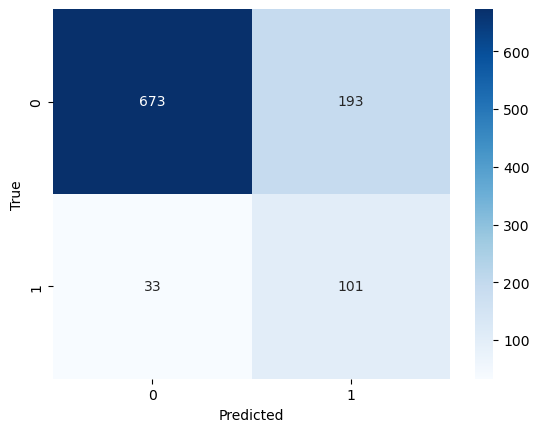

In [29]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.78      0.86       866
        True       0.34      0.75      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



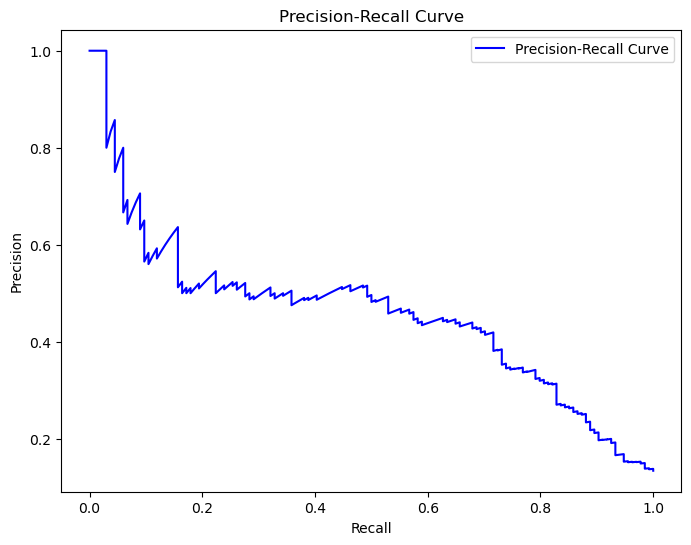

In [31]:
y_scores = best_log_reg.predict_proba(X_test_transformed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [32]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scores)
print("Average Precision Score:", average_precision)

Average Precision Score: 0.4601856112388743


### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


rubric={points=40}

For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [33]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:10}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [34]:
housing_df = fetch_california_housing(as_frame=True).frame

train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

In [35]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333    

In [36]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['numerical_feature1', 'numerical_feature2']),
        ('cat', OneHotEncoder(), ['categorical_feature'])
    ]
)
X_train = train_df.drop('MedHouseVal', axis=1)
y_train = train_df['MedHouseVal']

X_test = test_df.drop('MedHouseVal', axis=1)
y_test = test_df['MedHouseVal']

In [37]:

numerical_features = X_train.columns  # List of all numerical feature names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("X_train_transformed shape:", X_train_transformed.shape)
print("y_train shape:", y_train.shape)

X_train_transformed shape: (16512, 8)
y_train shape: (16512,)


### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 

In [38]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_cv_scores = cross_val_score(dummy_regr, X_train_transformed, y_train, cv=5)

print("Cross-validation scores:", dummy_cv_scores)
print("Mean cross-validation score:", dummy_cv_scores.mean())

Cross-validation scores: [-3.72082135e-04 -1.73645753e-05 -1.85918654e-06 -1.12986178e-03
 -6.59817419e-05]
Mean cross-validation score: -0.00031742988315350826


### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. Which model seems to be performing well with different metrics? 


In [39]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [ ]:
results = []

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    cv_scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=score_types_reg)
    
    for score_name in score_types_reg.keys():
        mean_score = np.mean(cv_scores[f'test_{score_name}'])
        results.append({'Model': model_name, 'Metric': score_name, 'Score': mean_score})

results_df = pd.DataFrame(results)
print(results_df)

Type your answer here:random forest seems to be performing better than ridge across all of the tests. it has lower errors, a higher r^2 score and a lower mape. 
this could be because forests ability to model complex and non-linear relationships while ridge which is linear cannot. 

### 3.4 Hyperparameter optimization 
rubric={points:8}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 

In [ ]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [ ]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    ridge_pipeline, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_squared_error',  # or 'r2', or any other suitable metric
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

### 3.5 Test results
rubric={points:6}

**Your tasks:**

1. Try the best model on the test set and use mape metric to evaluate your results.
2. Briefly comment on the results. (1 to 2 sentences) 

In [ ]:
best_ridge = Ridge(alpha=random_search.best_params_['ridge__alpha'])

best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', best_ridge)
])

best_pipeline.fit(X_train, y_train)

y_pred = best_pipeline.predict(X_test)

def mape(true, pred):
    return 10.0 * np.mean(np.abs((pred - true) / true))

test_mape = mape(y_test, y_pred)
print("MAPE on the test set:", test_mape)

Type your answer here: 3.19 means that it has a very low inaccuracy score and is fairly reliable. it would be good to compare this to other models to ensure accuracy. 

### 3.6 Model interpretation  
rubric={points:6}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. Use the `Ridge` model with best hyperparameters. Sort the coefficients in descending order. 
2. Increasing which feature values would result in higher housing price? 

In [ ]:
best_ridge.fit(X_train_transformed, y_train)

ridge_coefficients = best_ridge.coef_

feature_names = X_train.columns

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

Income and Housing Prices: the most important positive influence housing price in this model is probablu the median income of the area (MedInc), which highlights the strong relationship between economic status and housing value.
Geographic Impact: The model suggests that certain geographical areas (latitude and Longitude) are associated with lower housing prices.
Room Number Paradox: The negative coefficient for AveRooms is somewhat counterintuitive and may mean that there is an error. It could be related to how this variable interacts with others or specific characteristics of the dataset.

## Submission instructions
<hr>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.